In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM

In [4]:
input_file = 'E:\WorkSpace\Research\ChuTuan\dulieuCLN_SongNhue_2024.csv'
data = pd.read_csv(input_file)
X = data.drop(columns=['WQI'])
y = data['WQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)

(146, 18)
(37, 18)


In [6]:
def build_basic_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_model_three_layers(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_model_with_dropout(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))  # Dropout 20%
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Dropout 20%
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_simple_model(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_model_with_adamax(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adamax', loss='mean_squared_error')
    return model

def build_deep_model(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_model_with_batch_norm(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(Dense(1))  # Đầu ra là giá trị WQI
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [7]:
def evaluate_multiple_models(X_train, X_test, y_train, y_test):
    models = [
        build_basic_model(X_train.shape[1]),
        build_model_three_layers(X_train.shape[1]),
        build_model_with_dropout(X_train.shape[1]),
        build_simple_model(X_train.shape[1]),
        build_model_with_adamax(X_train.shape[1]),
        build_deep_model(X_train.shape[1]),
        build_model_with_batch_norm(X_train.shape[1]),
    ]
    
    for idx, model in enumerate(models):
        print(f"\nEvaluating Model {idx + 1}")
        
        # Huấn luyện mô hình
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
        
        # Đánh giá mô hình
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')
        
        # Vẽ biểu đồ so sánh dự đoán và giá trị thực
        plt.figure(figsize=(8, 6))
        plt.plot(y_test.values, label='True Values')
        plt.plot(y_pred, label='Predicted Values')
        plt.title(f'True vs Predicted WQI - Model {idx + 1}')
        plt.xlabel('Sample Index')
        plt.ylabel('WQI')
        plt.legend()
        plt.show()


Evaluating Model 1
Mean Squared Error: 54.71099622496921


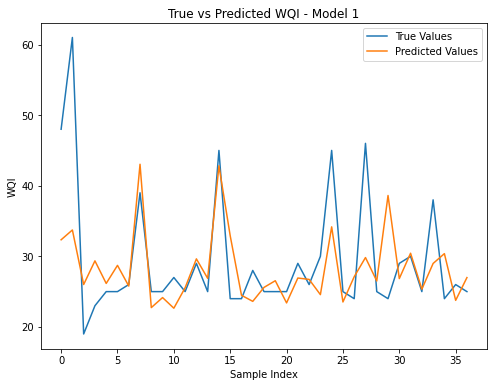


Evaluating Model 2
Mean Squared Error: 39.894225862362624


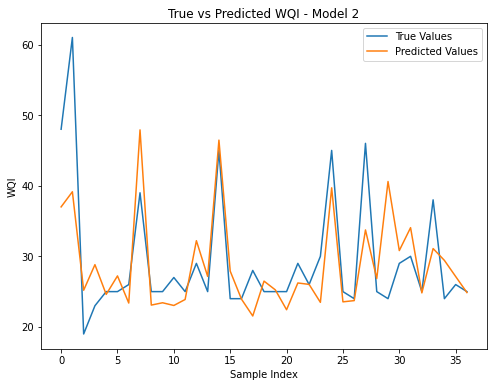


Evaluating Model 3
Mean Squared Error: 49.75421836780397


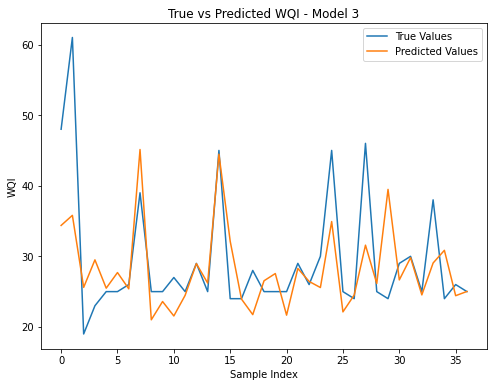


Evaluating Model 4
Mean Squared Error: 119.15598155548365


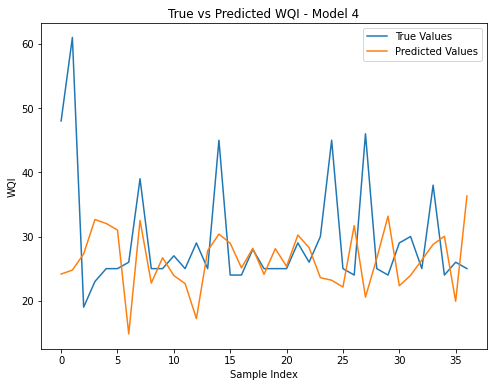


Evaluating Model 5
Mean Squared Error: 101.915752976558


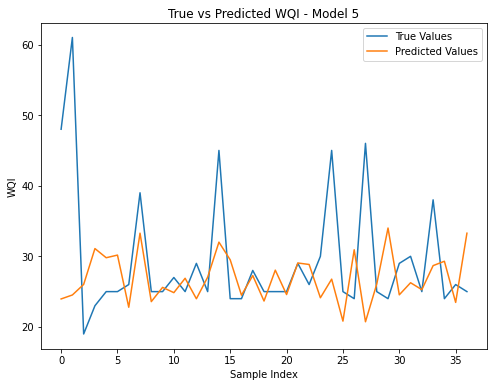


Evaluating Model 6
Mean Squared Error: 29.220987146077647


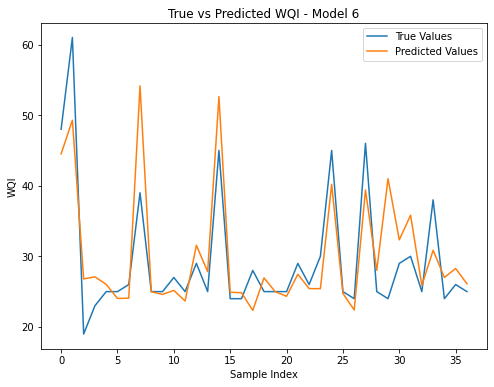


Evaluating Model 7
Mean Squared Error: 72.41332367033088


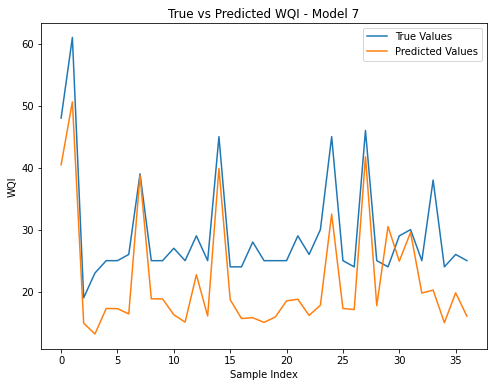

In [8]:
evaluate_multiple_models(X_train, X_test, y_train, y_test)